# Waffle Charts

By **Franklin Oliveira**

-----
This notebook contains all code necessary to make charts from `repteis` database with focus on time and space exploration. Here you'll find some basic data treatment and charts' code. 

Database: <font color='blue'>'Compilacao Livros Repteis - 2 a 10 - 2020_04_28.xls'</font>.m
    

## Basic imports

In [1]:
import datetime
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

from collections import defaultdict

# this package does most of the heavy work of constructing the Waffle Charts
# docs: https://pywaffle.readthedocs.io/en/latest/examples/block_shape_distance_location_and_direction.html
from pywaffle import Waffle 

alt.renderers.enable('default')

RendererRegistry.enable('default')

## Importing data...

In [2]:
NewTable = pd.read_csv('./data/treated_db.csv', sep=';', encoding='utf-8-sig')

/home/franklin/anaconda3/envs/viz/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2,39) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<br>

<font size=5>**Paleta de cores por Ordem**</font>

Abaixo está a imagem usada como inspiração (https://color.adobe.com/create/image)

<img src="./src/paleta_cores.jpeg" width='500px'>

Cores: 

- verde_escuro: #284021
- verde_claro: #88BF11
- amarelo: #D9CB0B
- laranja: #D99311
- laranja_escuro: #BF4417
- marrom-_laro: #BF8D7A

In [3]:
# 220 NaNs
NewTable['ordem'].value_counts(dropna=False)

Squamata       21993
Testudines       846
Crocodylia       257
NaN               32
Gymnophiona        2
Caudata            1
Serpentes          1
Name: ordem, dtype: int64

In [4]:
# p.s.: Caudata is an error and should be removed
cores_ordem = {
    'Squamata': '#BF4417',
    'Testudines': '#D9CB0B', 
    'Crocodylia': '#284021'
}

ordens = list(cores_ordem.keys())
cores = list(cores_ordem.values())

## Waffle Charts

----

### 1- Orders

In [5]:
def calcPercentages(df, col='order', discard_col= 'index'):
    
    if discard_col == 'index':
        temp = df.reset_index()
    else:
        temp = df
    
    percent = temp.groupby(col).count()[discard_col].reset_index().rename(
                                                                    columns={discard_col:'counts'})
    percent['percent'] = percent['counts'] / percent['counts'].sum()
    percent['percent'] = percent['percent'] * 100
    
    return percent

In [6]:
percent = calcPercentages(NewTable, col='ordem')
percent = percent[percent['ordem'].isin(ordens)].copy()

percent

,ordem,counts,percent
1,Crocodylia,257,1.112554
4,Squamata,21993,95.207792
5,Testudines,846,3.662338


In [7]:
# adicionando coluna com as cores por ordem
percent['cores'] = percent['ordem'].apply(lambda x: cores_ordem[x])

In [8]:
percent.sort_values('percent', inplace=True)

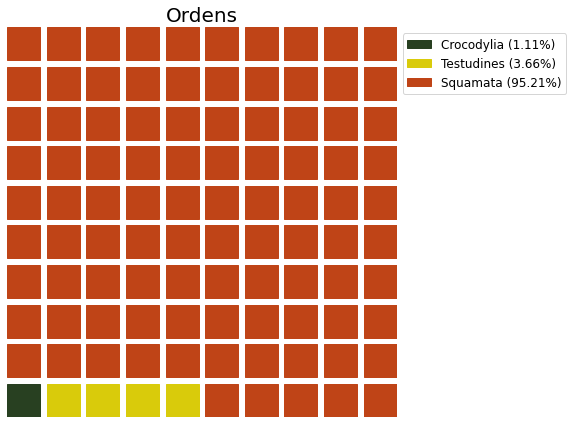

In [11]:
# standard figure
fig1 = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
#     columns=10, 
#     rounding_rule='nearest',
    values=[round(i) for i in percent['percent']],
    colors=list(percent['cores']),
    title={
        'label': 'Ordens', 
        'loc': 'center',
        'fontdict': {
            'fontsize':20
        }
    },
    labels=["{0} ({1}%)".format(k, round(v, 2)) for k, v in zip(percent['ordem'], percent['percent'])],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'fontsize':12},
    icon_size=18,
    vertical= True,
    icon_legend=True,
#     legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    figsize=(10, 6)  # figsize is a parameter of matplotlib.pyplot.figure
)

plt.savefig('./graphs/waffles/ordens.svg')
plt.savefig('./graphs/waffles/ordens.png')

plt.show()

<br>

-----

### 2- Orders per family

In [12]:
family_counts = NewTable['familia'].value_counts().reset_index()
family_counts.columns = ['familia', 'count']

In [13]:
NewTable.sort_values('ordem', inplace=True)

In [14]:
NewTable[NewTable['familia'] == '#n/d']['ordem']

22062    Serpentes
1333           NaN
Name: ordem, dtype: object

In [15]:
d = defaultdict()

index=0
for family in NewTable['familia'].unique():
    
    # comentar na reunião (ordem Caudata e Serpentes)
    if family == 'Nan' or family == '#n/d' or family == 'Plethodontidae':
        continue
    # filtrando a base e calculando percentuais
    temp = calcPercentages(NewTable[NewTable['familia']==family], col='ordem')
    temp.sort_values('percent', inplace=True)
    temp = temp[temp['ordem'].isin(ordens)]
    
    # criando coluna de cores
    temp['cores'] = temp['ordem'].apply(lambda x:cores_ordem[x])
    
    # contagem
    count = family_counts[family_counts['familia'] == family]['count'].values[0] 
       
    index +=1
    
    #dict for chart
    d[(5,10,index)]= { 
        'rows':10, 
    #     columns=10, 
    #     rounding_rule='floor',
        'values':list(temp['percent']),
        'colors':list(temp['cores']),
        # p.s.: thousands separator is: ,
        'title':{
            'label': f'Família: {family}\nTotal de registros: {count}'.replace(',','.'),
            'loc': 'left', 'fontsize':18},
        'icon_legend':True,
    }
        
d = dict(d)
# d

#### Making `waffle charts`

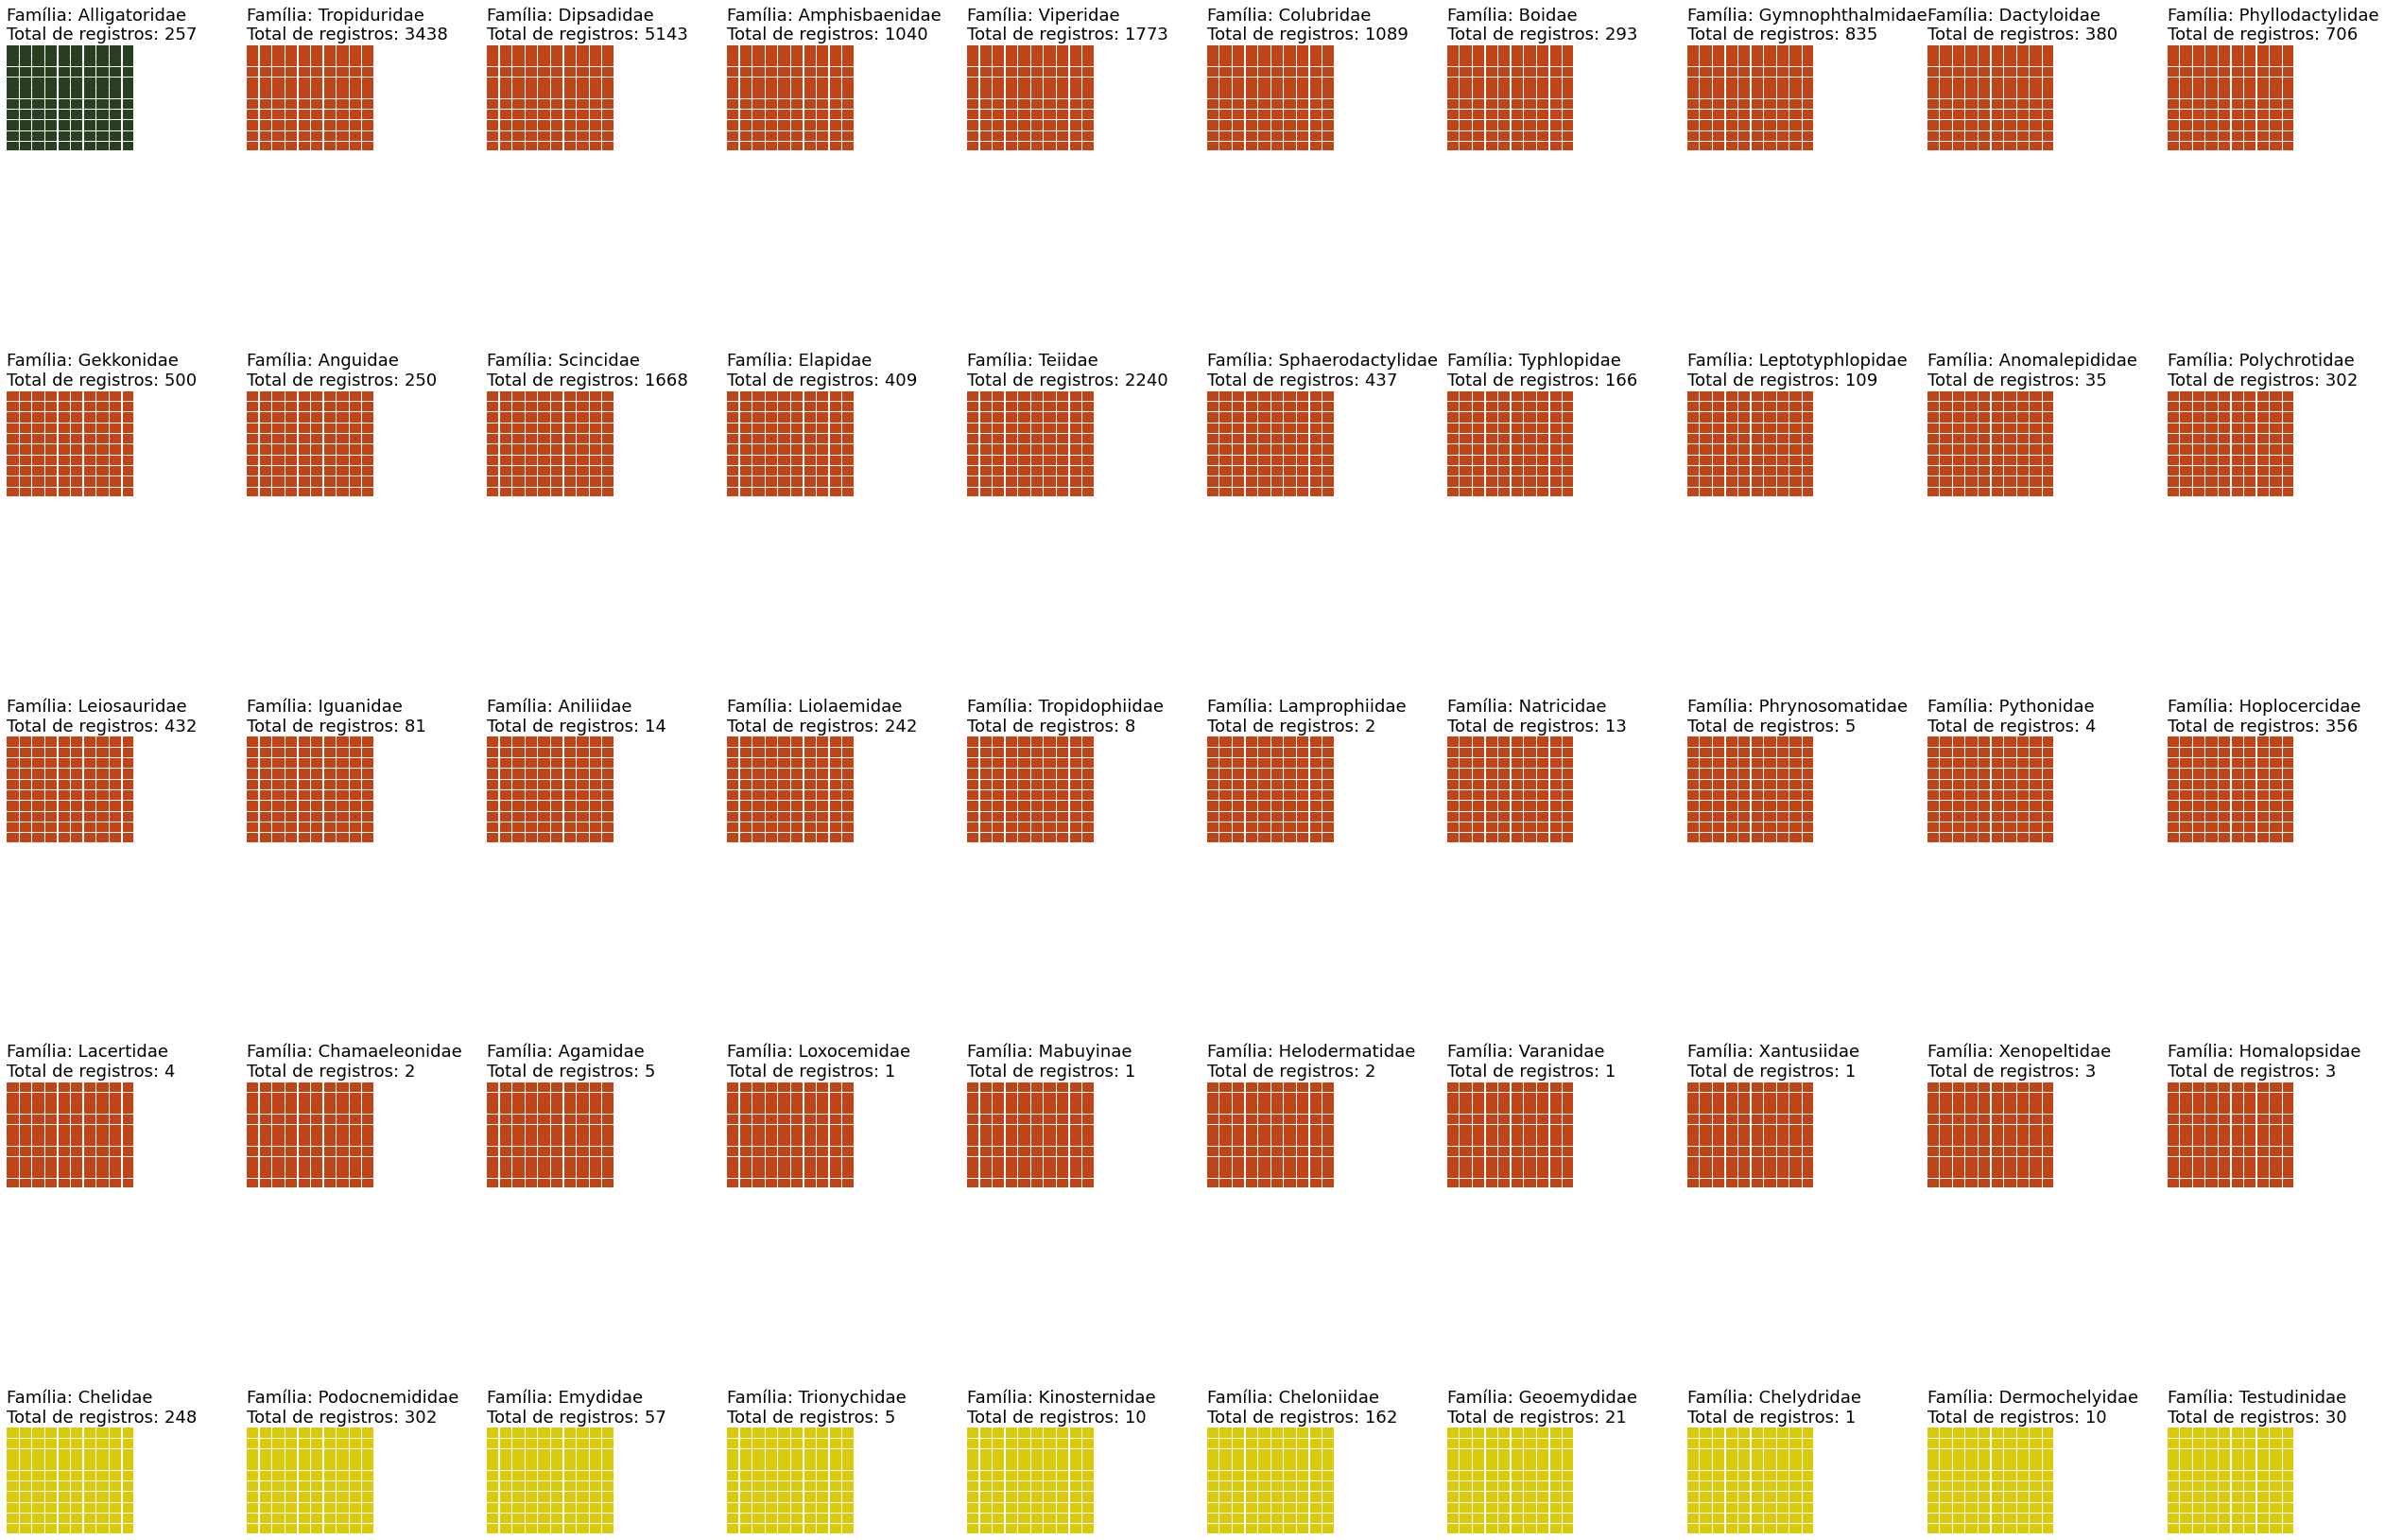

In [16]:
teste = plt.figure(
    FigureClass= Waffle,
    plots= d,
    rows=10, 
#     columns=10, 
    vertical=True, 
    block_aspect_ratio=1.2,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    figsize=(35, 35)  # figsize is a parameter of matplotlib.pyplot.figure
    
)

# saving charts
# plt.savefig('./graphs/waffles/familias.svg')
plt.savefig('./graphs/waffles/familias.png')

<br>

**The end!**

-----

In [19]:
# for col in NewTable.columns:
#     print('-', col)

In [68]:
# contar quantas ordens diferentes tem por familia

d = defaultdict()
for family in NewTable['familia'].unique():
    d[family] = NewTable[NewTable['familia'] == family]['ordem'].nunique()

In [69]:
# dict(d)

{'Chelidae': 1,
 'Helodermatidae': 1,
 'Amphisbaenidae': 1,
 'Colubridae': 1,
 'Boidae': 1,
 'Viperidae': 1,
 'Natricidae': 1,
 'Elapidae': 1,
 'Emydidae': 1,
 'Trionychidae': 1,
 'Chelydridae': 1,
 'Kinosternidae': 1,
 'Dipsadidae': 1,
 'Nan': 1,
 'Agamidae': 1,
 'Scincidae': 1,
 'Gekkonidae': 1,
 'Phyllodactylidae': 1,
 'Typhlopidae': 1,
 'Leptotyphlopidae': 1,
 'Teiidae': 1,
 'Polychrotidae': 1,
 'Hoplocercidae': 1,
 'Anguidae': 1,
 'Cheloniidae': 1,
 'Phrynosomatidae': 1,
 'Aniliidae': 1,
 'Podocnemididae': 1,
 'Geoemydidae': 1,
 'Gymnophthalmidae': 1,
 'Tropiduridae': 1,
 'Leiosauridae': 1,
 'Alligatoridae': 1,
 'Sphaerodactylidae': 1,
 'Iguanidae': 1,
 '#n/d': 1,
 'Liolaemidae': 1,
 'Testudinidae': 1,
 'Dermochelyidae': 1,
 'Mabuyinae': 1,
 'Dactyloidae': 1,
 'Tropidophiidae': 1,
 'Anomalepididae': 1,
 'Chamaeleonidae': 1,
 'Plethodontidae': 1,
 'Homalopsidae': 1,
 'Xenopeltidae': 1,
 'Lamprophiidae': 1,
 'Pythonidae': 1,
 'Xantusiidae': 1,
 'Varanidae': 1,
 'Loxocemidae': 1,
 'L